## 딥러닝 한번에 끝내기
### 6. 모델 학습 기술

### 6-1. 들어가며

![](./img06/01.png)

![](./img06/02.png)

과정 개요

모델 학습 기술
모델 학습에 영향을 미칠 수 있는 요소들은 어떤 것이 있는지 살펴보고 각각에 대해 알아봅니다.

과소적합과 과대적합
과소적합과 과대적합의 개념을 배우고 이를 어떻게 방지할 수 있는 방법은 어떤 것이 있는지 살펴봅니다.

IMDB 딥러닝 모델 예제
앞서 다룬 내용을 어떻게 적용하는지 IMDB 예제를 통해 알아봅니다.

학습 목표

딥러닝 모델 학습을 위한 다양한 개념과 기술들을 설명할 수 있습니다.

모델 학습이 잘 안될 경우 발생하는 과소적합/과대적합에 대해 설명할 수 있습니다.

IMDB 데이터셋을 이용해 긍정/부정 분류를 위한 딥러닝 모델을 만들어봅니다.

### 6-2. 모델 학습 기술

![](./img06/03.png)

![](./img06/04.png)

![](./img06/05.png)

![](./img06/06.png)

![](./img06/07.png)

![](./img06/08.png)

![](./img06/09.png)

![](./img06/10.png)

Q. 모든 데이터를 한 번에 넣고 학습시키는 전체 배치(Full Batch)방식이 있는데 왜 분할하여 넣는 미니 배치(Mini Batch) 방식을 사용하나요?

딥러닝은 많은 양의 데이터를 필요로 하고 모든 데이터를 한 번에 불러와서(load) 학습 시키는 것은 많은 리소스가 낭비되기 때문입니다.

미니 배치(Mini Batch) 학습 방식은 전체 데이터를 한 번에 처리하는 전체 배치(Full Batch) 학습 방식 대비 다음과 같은 장점이 있습니다.

1. 메모리 효율성: 전체 데이터를 한 번에 처리하면 메모리 용량 문제가 발생할 수 있습니다. 미니 배치 학습 방식은 데이터를 분할하여 처리하기 때문에 메모리 사용량이 적어집니다.

2. 빠른 학습 속도: 전체 데이터를 한 번에 처리할 때는 한 번에 많은 연산을 해야 하므로 처리 속도가 느릴 수 있습니다. 미니 배치 학습 방식은 작은 데이터 묶음을 처리하므로 연산 속도가 빠릅니다.

3. 일반화 성능 향상: 미니 배치 학습 방식은 데이터를 무작위로 추출하기 때문에 모델이 특정 데이터에 치우쳐서 학습되는 것을 방지할 수 있습니다. 이를 통해 과적합(Overfitting)을 방지하며 일반화 성능을 향상시킬 수 있습니다.

4. SGD 최적화 방법 적용 용이성: 미니 배치 학습 방식은 일반적으로 SGD(SGD: Stochastic Gradient Descent) 최적화 방법을 적용하기 용이합니다. SGD 최적화 방법은 각 미니 배치마다 모델 파라미터를 업데이트하기 때문입니다.

따라서, 위와 같은 이유로 미니 배치 학습 방식이 일반적으로 사용되는 학습 방식입니다.

Q. 대표적인 데이터 스케일링 방법인 표준화(Standardization)와 정규화(Normalization)은 어떤 차이가 있나요?

표준화는 평균이 0이지만 데이터 크기에 대한 제한이 없으며 정규화는 최대, 최소값이 각각 1과 0으로 정해져있습니다.

데이터 스케일링 방법인 표준화(Standardization)와 정규화(Normalization)은 둘 다 데이터를 전처리하는 기법입니다. 하지만 두 방법은 다음과 같은 차이점이 있습니다.

1. 정의:
- 표준화는 평균이 0, 표준편차가 1이 되도록 스케일링하는 방법입니다.
- 정규화는 데이터 값을 일정한 범위로 변환하는 방법입니다.

2. 스케일링 방법:
- 표준화는 각 데이터 값에서 평균을 빼고 표준편차로 나누어 변환합니다.
- 정규화는 최소값(min)과 최대값(max)을 이용하여 데이터 값을 [0, 1] 범위로 변환합니다.

3. 대상 데이터:
- 표준화는 전체 데이터의 범위가 크게 차이 나는 경우에 주로 사용합니다.
- 정규화는 값의 범위가 제한적인 경우나, 비교적 작은 데이터셋의 경우에 주로 사용합니다.

4. 이상치 영향:
- 표준화는 이상치(Outlier)에 영향을 덜 받습니다.
- 정규화는 이상치에 민감할 수 있습니다.

5. 변환 결과:
- 표준화는 스케일링 후 평균이 0, 표준편차가 1인 데이터로 변환됩니다. 일반적으로 많이 사용되며, 주로 분류 모델에서 사용됩니다.
- 정규화는 스케일링 후 최소값이 0, 최대값이 1이 되도록 데이터가 변환됩니다. 이진 분류에서 유용하며 신경망 모델에서 사용됩니다.

따라서, 표준화와 정규화는 각각 다르게 적용되며, 사용하고자 하는 데이터의 특성과 분석 목적에 맞게 선택하여 사용해야 합니다.

Q. 손실 함수의 최저값에 도달하기 위해선 학습률이 작을 수록 일반적으로 에폭의 수는 어떻게 될까요?

많아집니다. 학습률이 작은 경우 최저값에 도달하기까지 업데이트 횟수가 더 많이 필요하다는 의미이기 때문입니다.

손실 함수의 최저값에 도달하기 위해서는 일반적으로 학습률(learning rate)이 작을수록 에폭(epoch)의 수가 많아집니다. 학습률이 작을 경우, 모델 파라미터의 갱신이 느려지게 되므로, 최저값에 도달하기 위해서는 더 많은 반복 작업(에폭 수)이 필요합니다.

반면, 학습률이 클 경우, 모델 파라미터가 빠르게 변화하게 되므로 최저값에 도달한다면 상대적으로 더 적은 반복 작업(에폭 수)가 필요할 수 있습니다.

하지만, 학습률과 에폭 수의 관계는 모델의 복잡도, 데이터 세트의 크기, 모델 아키텍처 등에 따라 다양하게 달라질 수 있으므로, 학습률과 에폭 수를 결정하기 위해서는 실험적으로 조정해야 합니다. 또한, 학습률과 에폭 수는 모델의 최적화(Optimization)에 영향을 미치므로, 최적 모델을 찾기 위한 조정 작업은 매우 중요합니다.

Q. 활성화함수에는 시그모이드(Sigmiod)계열과 렐루(ReLU)) 두가지 계열로 나뉘는데 두 계열간 어떤 차이가 있나요?

시그모이드 계열은 결과값이 [0,1], 혹은 [-1,1] 사이의 값이 나오며 렐루 계열은 예외를 제외하면 0을 중심으로 양수는 양수 그대로를, 음수는 0이나 0에 가까운 수를 내놓습니다.

활성화 함수는 인공 신경망에서 입력 신호에 대한 출력을 결정합니다. 시그모이드 계열 함수와 렐루(Rectified Linear Unit, ReLU) 계열 함수는 활성화 함수의 종류 중 대표적인 두 가지입니다. 두 함수의 차이점은 아래와 같습니다.

1. 범위: 시그모이드 계열의 함수는 0과 1 사이의 값을 출력하며, ReLU 계열 함수는 0과 양의 값을 출력합니다.

2. 성능: ReLU 계열의 함수는 학습 속도가 빠르고, 계산이 간단하여 대규모 데이터셋에 많이 사용됩니다. 반면, 시그모이드 계열의 함수는 S자 모양의 곡선을 그리며 출력 값이 부드럽게 변화하기 때문에 로지스틱 회귀 분류 문제 등에 적용됩니다.

3. 기울기 소실 문제: 시그모이드 함수는 입력값이 너무 크거나 작으면 미분값이 0에 가까워져 기울기 소실 문제(vanishing gradient problem)이 발생할 수 있습니다. 반면 ReLU 함수는 양수 범위에서는 미분값이 1인 선형 함수이기 때문에 기울기 소실 문제를 해결할 수 있습니다. 그러나 음수 범위에서는 미분값이 0이 되기 때문에 “dying ReLU” 문제가 발생할 수 있습니다.

4. 계산 효율: 시그모이드 함수는 지수 함수를 사용하기 때문에 계산 비용이 높지만, ReLU 함수는 비교적 계산 비용이 적습니다.

따라서, 시그모이드 함수와 ReLU 함수는 각각 장단점이 있으며, 어떤 함수를 사용할지는 문제의 종류, 데이터의 특성, 모델의 복잡도 등에 따라 다르게 결정됩니다. 최근에는 ReLU 함수와 그 변종 함수가 성능이 뛰어나므로, 대부분의 딥러닝 모델에서 ReLU 함수를 사용하는 경향이 있습니다.

Q. 적절한 가중치 초기값을 정해주는 것은 어떤 효과를 가져올 수 있나요?

표현할 수 있는 신경망의 수가 많아지고 더 많은 가중치에 역전파가 전달 가능하며 비교적 많은 문제를 표현할 수 있게 됩니다.

가중치 초기값(initial weight)은 인공 신경망에서 매우 중요한 역할을 합니다. 적절한 가중치 초기값을 선택해주는 것이 모델의 학습 속도, 일반화 성능 등을 향상시킬 수 있습니다. 이에 대한 구체적인 효과는 다음과 같습니다.

1. 학습 속도 향상: 가중치 초기값이 잘 설정되면, 최적화 알고리즘이 잘 수렴할 수 있습니다. 초기값이 잘못 설정되면, 최적화 알고리즘이 수렴하기 어렵거나, 매우 느리게 수렴할 수 있습니다.

2. 과적합 방지: 가중치 초기값이 적절하게 설정되면 과적합(Overfitting)을 방지할 수 있습니다. 과적합은 학습 데이터에 대해서는 높은 성능을 보이지만, 일반화 성능이 떨어지는 현상을 말합니다.

3. Gradient Vanishing 문제 방지: 인공 신경망의 깊이가 깊어질수록, 기울기 소실(Gradient Vanishing) 문제가 발생하기 쉽습니다. 가중치 초기값이 적절하게 설정되면, Gradient Vanishing 문제를 방지할 수 있습니다.

4. 출력값 분포 조절: 가중치 초기값이 적절하게 설정되면, 출력값이 일정 범위 내에서 분포하도록 할 수 있습니다. 이를 통해 모델의 안정성을 높일 수 있습니다.

따라서, 적절한 가중치 초기값을 선택하는 것은 딥러닝 모델의 성능에 큰 영향을 미치는 중요한 요소입니다. 초기값이 잘 설정되어야만 최적화 알고리즘이 국지 최소점(local minimum)이 아닌 전역 최소점(global minimum)으로 수렴할 가능성이 커지며, 과적합과 기울기 소실 문제를 방지할 수 있습니다.

Q. 옵티마이저의 역할과 목적은 무엇인가요?

손실함수를 감소시키기 위해(실제와 예측간의 차이를 감소시키기 위해) 가중치를 업데이트 하는 방식을 결정합니다.

옵티마이저(optimizer)는 인공 신경망에서 가중치(weight)를 조정해가면서 손실 함수(loss function) 값을 최소화하는 과정을 관리하는 중요한 역할을 합니다. 즉, 옵티마이저는 인공 신경망의 학습 과정에서 모델 파라미터를 업데이트하며, 그 값이 최적으로 수렴하도록 도와줍니다.

옵티마이저의 목적은 두 가지입니다. 첫째, 모델이 최소값을 찾을 수 있도록 돕는 것이며, 둘째, 모델이 최적화된 상태를 유지하는 것입니다.

옵티마이저는 주로 경사 하강법(Gradient Descent) 기반의 방법을 사용합니다. 경사 하강법은 현재 매개변수 값에서 비용 함수의 기울기에 따라 이동하며, 이동 거리는 학습률(learning rate)에 비례합니다. 필요에 따라 경사 하강법에 정규화(regularization) 항이 추가되기도 합니다.

주요 옵티마이저 알고리즘으로는 위의 경사 하강법을 개선한 대표적인 방법인 확률적 경사 하강법(Stochastic Gradient Descent, SGD) 및 그 파생 알고리즘인 모멘텀 최적화(Momentum Optimization), 아다그라드(Adagrad), 아담(Adam) 등이 있습니다. 이러한 알고리즘은 각자의 특징에 따라 모델 학습에 최적의 전략을 적용할 수 있습니다.

따라서, 옵티마이저는 인공 신경망 학습의 핵심 역할 중 하나입니다. 정확하고 효율적인 옵티마이저 선택은 모델 성능과 학습 속도에 큰 영향을 미치게 됩니다.

### 6-3. 과소적합과 과대적합

![](./img06/11.png)

Q. 과소적합과 과대적합을 방지하기 위해선 어떤 방법들을 사용할 수 있나요?

에폭수를 적절히 조절하거나 적절한 크기의 모델을 선택, 혹은 충분한 데이터를 수집하는 방법 등을 사용할 수 있습니다.

과대적합(Overfitting)과 과소적합(Underfitting)은 인공 신경망 모델에서 중요한 문제 중 하나로, 이를 방지하기 위해서는 다음과 같은 방법들을 사용할 수 있습니다.

1. 데이터 수 증가(Data Augmentation): 학습 데이터의 수를 증가시켜 모델이 데이터의 다양성을 더욱 잘 학습할 수 있도록 합니다. 예를 들어, 이미지 데이터에서 회전, 이동, 확대/축소 등의 변형을 가해 데이터 수를 늘리는 방법이 있습니다.

2. 모델 복잡도 줄이기: 모델의 복잡도를 낮추어 과적합을 방지합니다. 예를 들어, 더 적은 수의 뉴런 또는 층을 사용하거나, 정규화(regularization) 기법(드롭아웃(Dropout) 등)을 적용합니다.

3. 가중치 규제(Weight Regularization): 모델의 가중치 크기를 제한함으로써 모델이 간단하게 유지되도록 합니다. 이 방법으로는 L1, L2 등의 규제 방법이 있습니다.

4. 조기 종료(Early Stopping): 학습을 지속하여 과적합될 수 있는 경우를 방지하기 위해, 검증 데이터(validation data)에 대한 손실값이 일정 기간 동안 개선되지 않으면 학습을 멈춥니다.

5. 앙상블(Ensemble): 여러 개의 간단한 모델을 결합하여 복잡한 문제를 해결하는 방식으로, 일반화 성능을 향상시키고, 과적합을 방지할 수 있습니다.

6. 학습률 스케줄링(Learning Rate Scheduling): 학습률을 설정하는 기법으로, 모델 학습 도중 학습률을 점진적으로 줄여가는 방법 등을 사용하여 효과적인 과적합 대처가 가능합니다.

위의 방법들은 과대적합과 과소적합을 방지하고 일반화 성능을 향상시키는 방법 중 일부이며, 적절한 방법들을 선택해 적용해야 합니다.

![](./img06/12.png)

#### 데이터 로드 및 전처리

케라스에서는 IMDB 영화 리뷰 데이터를 imdb.load_data() 함수를 통해 다운로드가 가능합니다. 예제로 사용하는 것이니 num_words는 10000개로만 제한하여 데이터를 로드합니다. 즉, 단어의 인덱스는 0부터 9999까지만 구성됩니다.

train_data의 0번째를 출력해보면 단어들의 인덱스가 출력되는 것을 알 수 있습니다. 그리고 train_label의 0번째를 출력하면 긍정을 의미하는 1이 출력되는 것을 알 수 있습니다.

In [1]:
from keras.datasets import imdb
import numpy as np

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

print(train_data[0])
print(train_labels[0])

2023-08-08 15:47:08.779877: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


17464789/17464789 [==============================] - 2s 0us/step
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178,

IMDB의 데이터셋은 인덱스로만 구성되어 있기 때문에 실제 단어들로 변환하기 위해서는 단어 인덱스 딕셔너리를 이용해야하며, imdb.get_word_index() 함수를 통해 얻을 수 있습니다.
아래 코드블럭의 주석을 풀면 word_index 딕셔너리를 확인하실 수 있습니다.
(스크롤의 압박이 느껴질 수 있어요.😅)

In [2]:
word_index = imdb.get_word_index()
word_index

1641221/1641221 [==============================] - 0s 0us/step


{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

단어 인덱스 딕셔너리를 인덱스 단어 딕셔너리 형태로 역으로 변환시킵니다.
아래 코드블럭의 주석을 풀면 index_word 딕셔너리를 확인하실 수 있습니다.
(스크롤의 압박이 느껴질 수 있어요.😅)

In [3]:
index_word = dict([(value, key) for (key, value) in word_index.items()])
index_word

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

imdb.get_word_index() 함수를 통해 얻은 데이터의 index는 단어 출현 빈도 기준으로 내림차수 정렬되어있습니다. 따라서 아래 코드블럭의 index_word 의 키 값을 바꿔가며 해당 출현 빈도 순에 해당하는 단어를 살펴볼 수 있어요.

In [5]:
# 1 순위의 출현 빈도를 기록한 단어를 출력합니다.
# 키 값의 숫자를 바꿔가며 다른 순위의 단어들도 확인해볼 수 있어요!
index_word[2]

'and'

index_word의 키를 바꿔가며 출현 순위별 단어를 확인해보았다면 아래 코드를 작성해보세요.

Q. 25번째 단어를 키로 삼아 word_index에 어떤 값(value)가 담겨있는지 확인해 봅시다.

In [6]:
word_25th = index_word[25]
print(word_25th)

have


train_data[0]의 각 인덱스에 매핑되는 단어들로 연결하여 하나의 리뷰를 만들어 줍니다.

In [7]:
review = ' '.join([str(i) for i in train_data[0]])
review

'1 14 22 16 43 530 973 1622 1385 65 458 4468 66 3941 4 173 36 256 5 25 100 43 838 112 50 670 2 9 35 480 284 5 150 4 172 112 167 2 336 385 39 4 172 4536 1111 17 546 38 13 447 4 192 50 16 6 147 2025 19 14 22 4 1920 4613 469 4 22 71 87 12 16 43 530 38 76 15 13 1247 4 22 17 515 17 12 16 626 18 2 5 62 386 12 8 316 8 106 5 4 2223 5244 16 480 66 3785 33 4 130 12 16 38 619 5 25 124 51 36 135 48 25 1415 33 6 22 12 215 28 77 52 5 14 407 16 82 2 8 4 107 117 5952 15 256 4 2 7 3766 5 723 36 71 43 530 476 26 400 317 46 7 4 2 1029 13 104 88 4 381 15 297 98 32 2071 56 26 141 6 194 7486 18 4 226 22 21 134 476 26 480 5 144 30 5535 18 51 36 28 224 92 25 104 4 226 65 16 38 1334 88 12 16 283 5 16 4472 113 103 32 15 16 5345 19 178 32'

In [8]:
review = ' '.join([index_word.get(i-3, '?') for i in train_data[0]])
review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

텍스트 데이터를 딥러닝 모델의 학습에 사용하기 위해서는 원-핫 인코딩(one-hot encoding)을 이용해 0과 1의 벡터로 변환하여 Dense 레이어를 사용하는 방법이 있고, 그 밖에도 고정 길이를 가지도록 패딩(padding)을 추가하고 임베딩(embedding) 레이어를 사용하는 방법이 있습니다. 이 예제에서는 10000 차원을 가지는 원-핫 인코딩으로 IMDB 데이터를 처리하도록 합니다.

In [9]:
def one_hot_encoding(data, dim=10000): # imdb 데이터의 num_words를 10000으로 설정해서 dim도 10000으로 맞춰줍니다.
  results = np.zeros((len(data), dim))
  for i, d in enumerate(data):
    results[i, d] = 1.
  return results

x_train = one_hot_encoding(train_data)
x_test = one_hot_encoding(test_data)

print(x_train[0])

[0. 1. 1. ... 0. 0. 0.]


IMDB의 레이블은 1은 긍정, 0은 부정으로 정의되어 있는데, 정수형 값을 실수형 값으로 변환을 시켜줍니다.

In [10]:
print(train_labels[0])
print(test_labels[0])

1
0


In [11]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

print(y_train[0])
print(y_test[0])

1.0
0.0


#### 모델 구성

이제 실제 IMDB 데이터셋을 학습하고 긍정/부정을 분류할 딥러닝 모델을 정의합니다. Sequential() 함수를 이용해서 순차적으로 레이어를 추가합니다.

첫번째 레이어는 Dense로 유닛수 16개를 가지고, input_shape을 (10000, )으로 정의하여 10000 차원의 데이터를 입력으로 받을 수 있게 합니다. 그리고 활성화 함수인 activation은 relu로 사용하고, 레이어의 이름인 name을 input으로 지정합니다.

두번째 레이어도 마찬가지로 Dense로 유닛수 16개를 가지고, relu 활성화 함수를 사용하고 이름은 hidden으로 지정합니다.

세번째 레이어도 Dense 레이어를 사용하지만, 긍정/부정 결과만 받도록 유닛수는 1개만 가지고, 활성화 함수는 sigmoid를 사용하고, 이름은 output으로 지정합니다.

In [12]:
import tensorflow as tf
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000, ), name='input'))
model.add(layers.Dense(16, activation='relu', name='hidden'))
model.add(layers.Dense(1, activation='sigmoid', name='output'))

#### 모델 컴파일 및 학습

이제 정의한 모델을 컴파일을 통해서 옵티마이저인 optimizer는 rmsprop를 사용하고, 손실 함수인 loss는 긍정/부정만 분류하므로 binary_crossentropy를 지정합니다. 그리고 지표인 metrics는 accuracy를 사용합니다. 이제 summary() 함수를 사용해 모델의 구조를 시각화합니다.

In [13]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Dense)               (None, 16)                160016    
                                                                 
 hidden (Dense)              (None, 16)                272       
                                                                 
 output (Dense)              (None, 1)                 17        
                                                                 
Total params: 160305 (626.19 KB)
Trainable params: 160305 (626.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


이제 딥러닝 모델을 학습하기 위해 fit() 함수를 실행시킵니다. 학습에 사용되는 데이터로 x_train과 y_train을 지정하고, 에폭 수인 epochs는 20으로 지정하고, 배치 사이즈인 batch_size는 512로 지정합니다. 그리고 검증을 위해서 테스트 데이터인 x_test와 y_test를 지정해줍니다.

In [14]:
history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 3s 50ms/step - loss: 0.4644 - accuracy: 0.8124 - val_loss: 0.3501 - val_accuracy: 0.8714
Epoch 2/20
49/49 [==============================] - 1s 13ms/step - loss: 0.2698 - accuracy: 0.9045 - val_loss: 0.2840 - val_accuracy: 0.8897
Epoch 3/20
49/49 [==============================] - 1s 13ms/step - loss: 0.2130 - accuracy: 0.9222 - val_loss: 0.2840 - val_accuracy: 0.8857
Epoch 4/20
49/49 [==============================] - 1s 13ms/step - loss: 0.1831 - accuracy: 0.9327 - val_loss: 0.2985 - val_accuracy: 0.8810
Epoch 5/20
49/49 [==============================] - 1s 14ms/step - loss: 0.1592 - accuracy: 0.9433 - val_loss: 0.3009 - val_accuracy: 0.8819
Epoch 6/20
49/49 [==============================] - 1s 15ms/step - loss: 0.1437 - accuracy: 0.9483 - val_loss: 0.3217 - val_accuracy: 0.8781
Epoch 7/20
49/49 [==============================] - 1s 15ms/step - loss: 0.1272 - accuracy: 0.9555 - val_loss: 0.3350 - val_accuracy: 0.8764
Epoch 8/20
49

학습하며 저장된 모델의 지표 결과인 history에서 loss, val_loss, accuracy, val_accuracy를 차트로 시각화합니다.

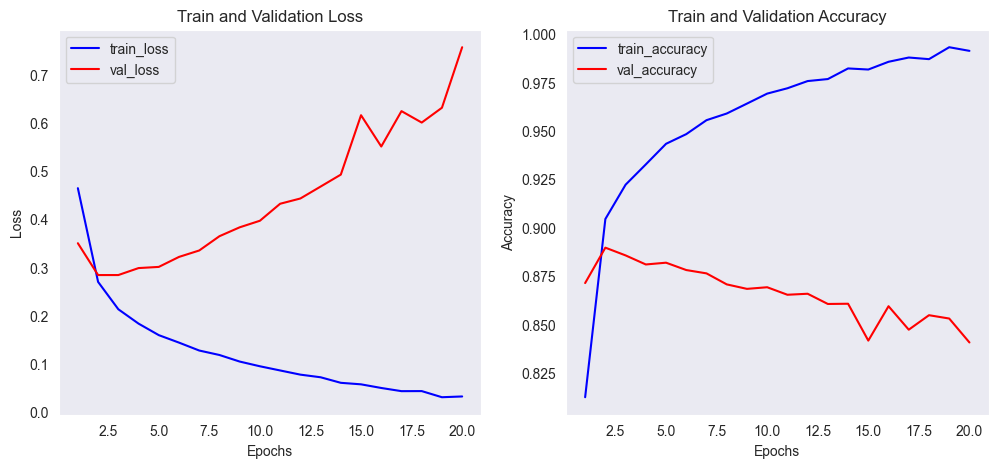

In [15]:
import matplotlib.pyplot as plt

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color='blue', label='train_loss')
ax1.plot(epochs, val_loss, color='red', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, color='blue', label='train_accuracy')
ax2.plot(epochs, val_accuracy, color='red', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

딥러닝 모델의 결과를 살펴보면 val_loss가 점점 증가하는 것을 알 수 있고, val_accuracy는 점점 감소하는 것을 알 수 있습니다. 즉, 과대적합되어 학습용 데이터셋에 대해서만 모델이 적합하게 된 것을 알 수 있습니다.

#### 이번시간 정리

딥러닝 모델을 학습하기 위한 다양한 기술들에 대해서 이해했습니다.

딥러닝 모델이 잘 학습되지 않을 경우 발생하는 과소적합과 과대적합에 대해서 이해했습니다.

IMDB 데이터셋을 이용한 딥러닝 분류 모델 예제를 살펴보았습니다.

종합 퀴즈

Q. IMDB 데이터셋을 이용한 딥러닝 분류 모델의 결과는 과대적합이었습니다. 혹시 이를 방지하기 위해 오늘 배운 내용 중 적용해볼 수 있는 것이 있을까요?

에폭수를 줄이거나 학습률, 혹은 모델 크기를 줄여볼 수 있습니다. 혹은 비슷한 데이터를 추가적으로 수집할 수도 있습니다.

IMDB 데이터셋을 이용한 딥러닝 분류 모델에서 과대적합 문제가 발생한 것은 일반적인 상황이며, 과대적합을 해결하기 위해서는 다음과 같은 방법들을 적용할 수 있습니다.

1. 모델 복잡도를 줄이기: 과대적합을 방지하기 위해서는 모델의 복잡도를 줄이는 것이 좋습니다. 예를 들어, 더 적은 수의 뉴런 또는 층을 사용하거나, 정규화(regularization) 기법(드롭아웃(Dropout) 등)을 적용할 수 있습니다.

2. 데이터 수 증가(Data Augmentation): 학습 데이터의 수를 증가시켜 모델이 데이터의 다양성을 더욱 잘 학습할 수 있도록 합니다. 예를 들어, 텍스트 데이터에서는 문장을 잘라내거나 삽입하는 등의 변형을 가해 데이터 수를 늘릴 수 있습니다.

3. 가중치 규제(Weight Regularization): 모델의 가중치 크기를 제한함으로써 모델이 간단하게 유지되도록 합니다. 이 방법으로는 L1, L2 등의 규제 방법이 있습니다.

4. 조기 종료(Early Stopping): 학습을 지속하여 과적합될 수 있는 경우를 방지하기 위해, 검증 데이터(validation data)에 대한 손실값이 일정 기간 동안 개선되지 않으면 학습을 멈춥니다.

5. 학습률 스케줄링(Learning Rate Scheduling): 학습률을 설정하는 기법으로, 모델 학습 도중 학습률을 점진적으로 줄여가는 방법 등을 사용하여 효과적인 과적합 대처가 가능합니다.

위의 방법들을 모두 적용할 필요는 없으며, 데이터셋의 특성과 모델의 복잡도 등에 따라 다른 방법을 선택해야 합니다. 이를 통해 과대적합을 방지하고 모델의 성능을 향상시킬 수 있습니다.